In [50]:
import numpy as np
import pandas as pd

In [51]:
#movies_index=['movieID','title','genres']
#rate_index=['userID','movieID','rating','timestamp']
#tag_index=['userID','movieID','tag','timestamp']
mname=pd.read_csv('/Users/zhangchen/Downloads/ml-20m/movies.csv', dtype={'movieID': np.int32})
rname=pd.read_csv('/Users/zhangchen/Downloads/ml-20m/ratings.csv', dtype={'userID': np.int32,'movieID': np.int32,'rating': np.float64})
#tname=pd.read_csv('/Users/zhangchen/Downloads/ml-20m/tags.csv', names=tag_index)

In [52]:
mname.info()
mname.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
rname.info()
rname.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [54]:
#data = pd.merge(pd.merge(ratings, users), movies)
merge_table=pd.merge(rname,mname)

In [55]:
merge_table.info()
merge_table.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
title        object
genres       object
dtypes: float64(1), int64(3), object(2)
memory usage: 1.0+ GB


,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


In [56]:
re_columns=['userID','movieID','title','genres','rating','timestamp']
merge_table.reindex(columns=re_columns)
merge_table.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


In [58]:
title_count=merge_table.groupby('title').size()
active_title=title_count[title_count>10]
new_table=merge_table.loc[active_title]
new_table.reset_index(drop=True)[:10]

,userId,movieId,rating,timestamp,title,genres
0,960,2,3.0,837155475,Jumanji (1995),Adventure|Children|Fantasy
1,170,2,3.0,940253294,Jumanji (1995),Adventure|Children|Fantasy
2,298,2,3.0,992463326,Jumanji (1995),Adventure|Children|Fantasy
3,409,2,4.0,1336405808,Jumanji (1995),Adventure|Children|Fantasy
4,278,2,3.5,1083178789,Jumanji (1995),Adventure|Children|Fantasy
5,578,2,1.5,1210655869,Jumanji (1995),Adventure|Children|Fantasy
6,164,2,3.0,845248397,Jumanji (1995),Adventure|Children|Fantasy
7,152,2,3.0,1161215251,Jumanji (1995),Adventure|Children|Fantasy
8,1159,2,4.0,1018348183,Jumanji (1995),Adventure|Children|Fantasy
9,775,2,2.0,1113802230,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
rating_ave=new_table.pivot_table('rating',index='title',aggfunc='mean')
rating_ave

Text(0.5, 0, 'title')

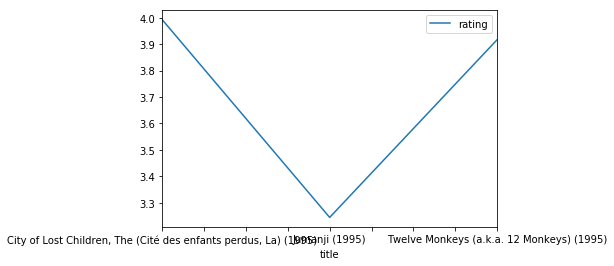

In [48]:
rating_ave.plot.line().set_xlabel('title', rotation=0)